In [102]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
# %load_ext autoreload
# %autoreload 2

# # import importlib
# # importlib.reload(pyCompute)

## Case Setting

In [104]:
Pe=0.01
DO2 = 7.63596e-6
w = 30e-6
U_0   = Pe*DO2/w
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"reference air flux:0.24~1.90 m3/(m2 min)  ")

average inlet velocity: 0.00254532 m/s
air flux: 0.1527192 m3/(m2 min) 
reference air flux:0.24~1.90 m3/(m2 min)  


## Min/Max fields

In [105]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full4/postProcessing/minMaxComponents2/11.5/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full4/postProcessing/minMaxMagnitude/11.5/fieldMinMax.dat"
sampling_rate=5

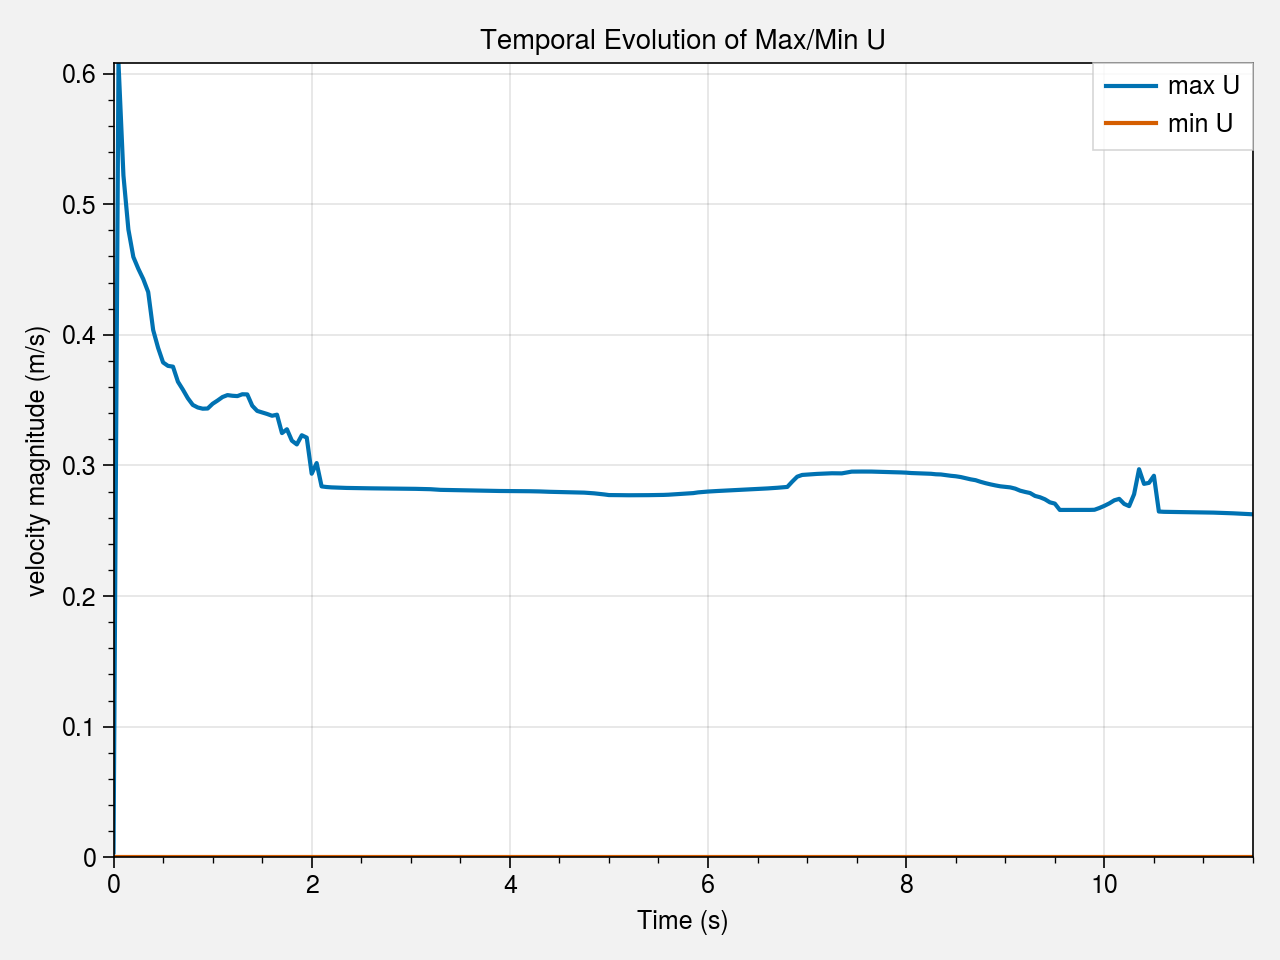

In [106]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

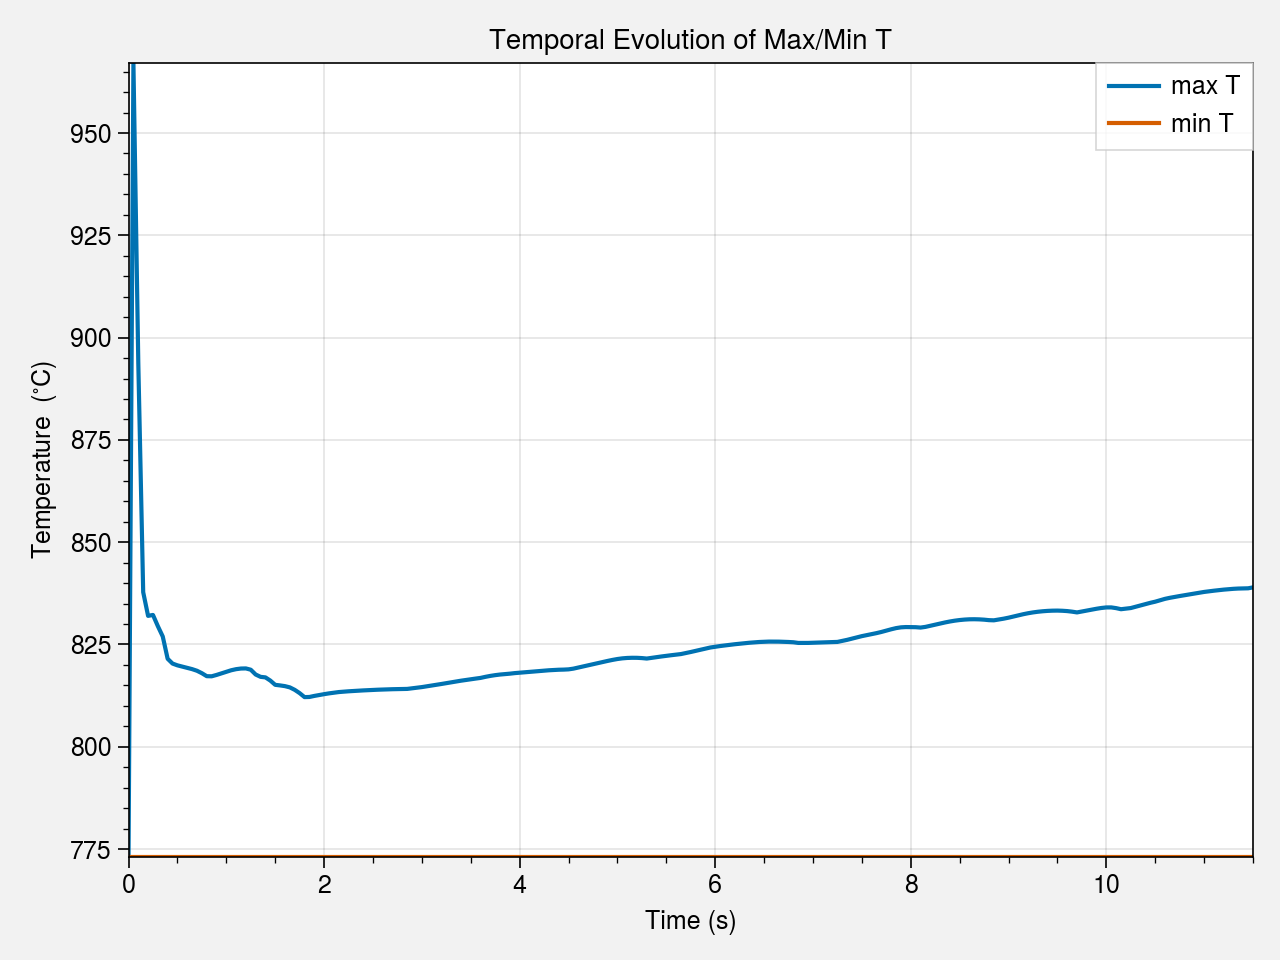

In [107]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  ($^{\circ}$C)")

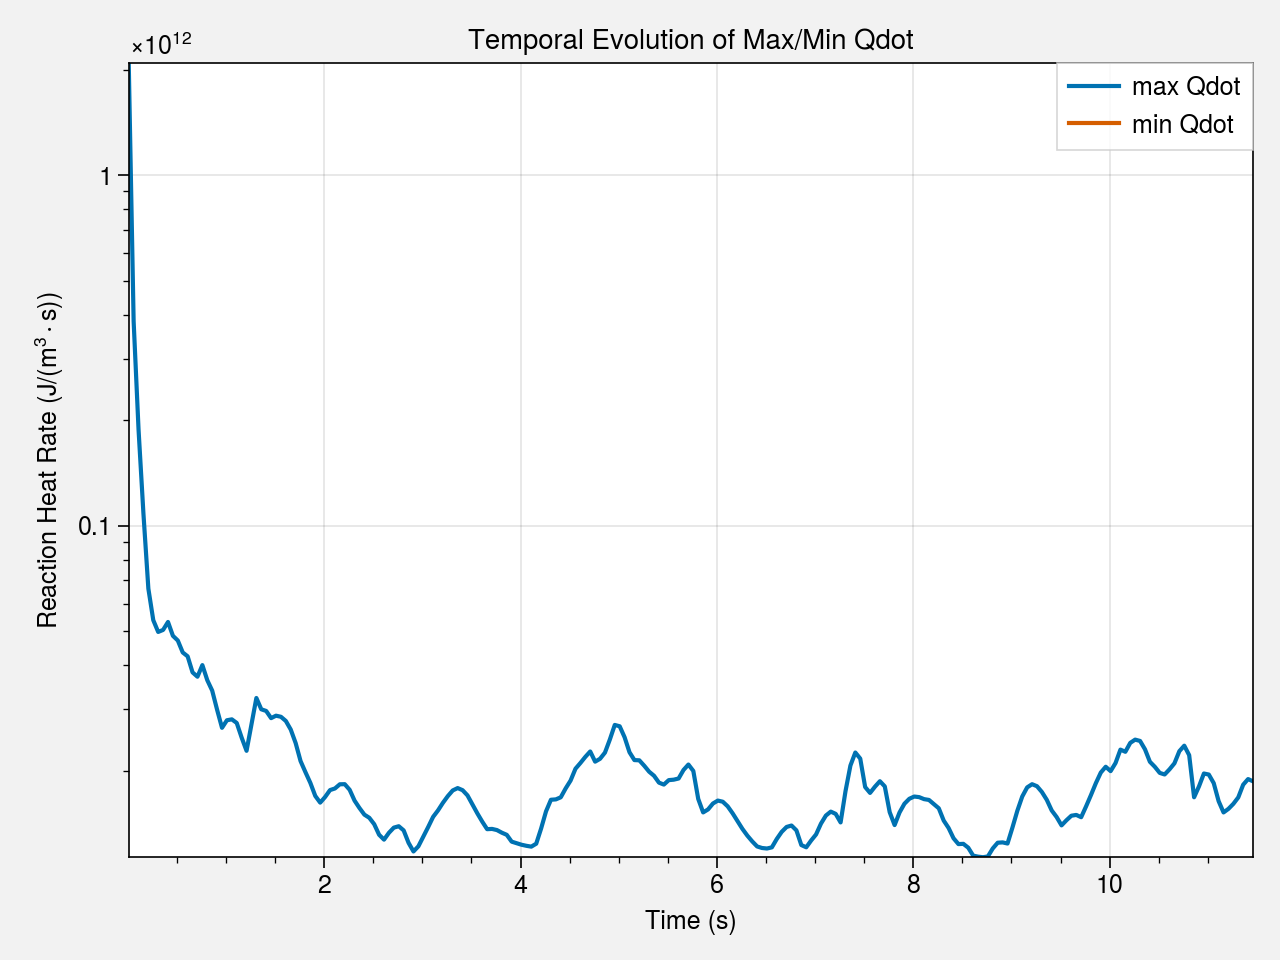

In [108]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
# ax.set_ylim([1e10,2e11])

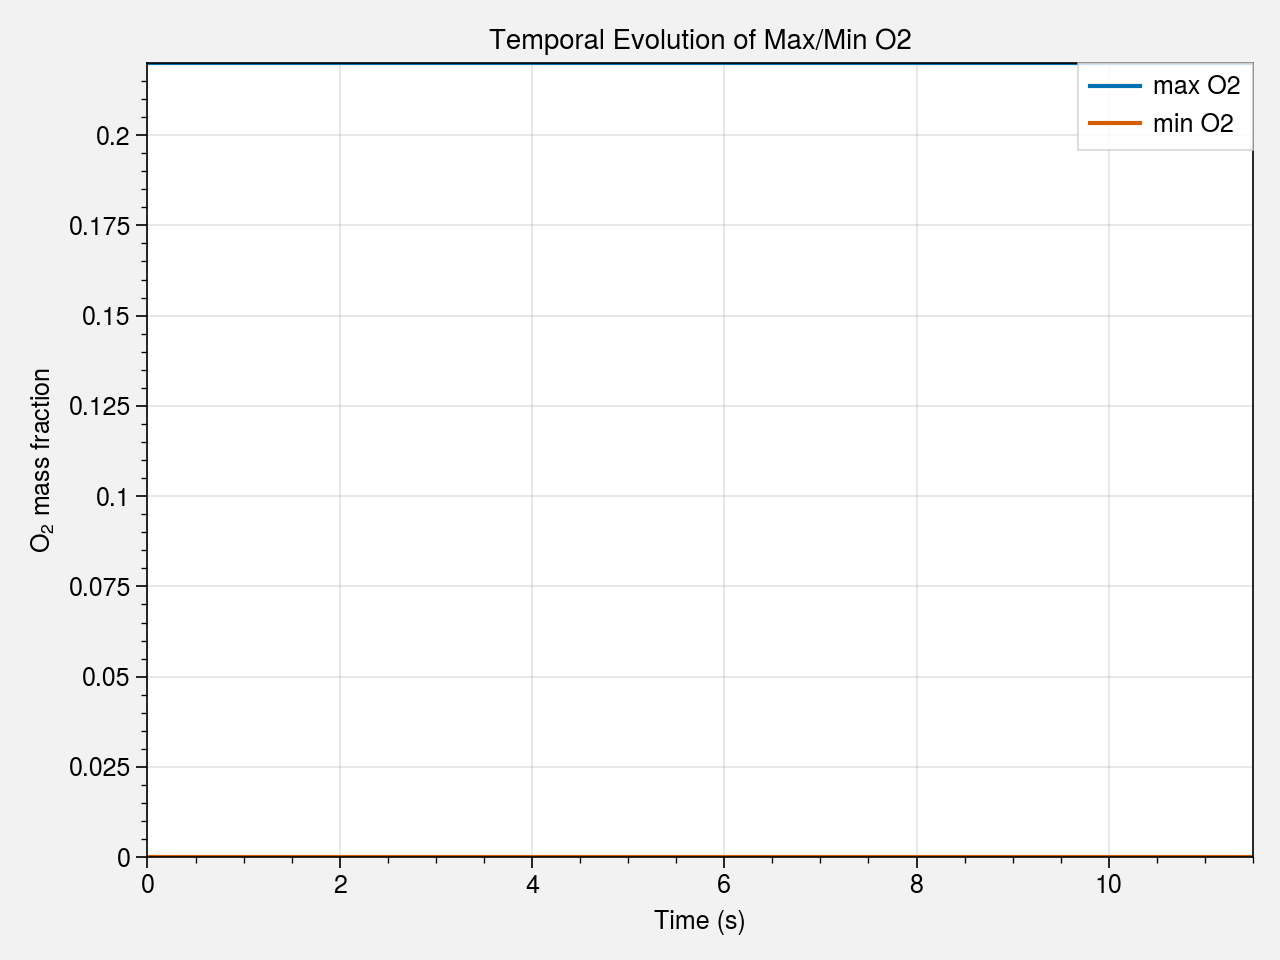

In [109]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"O2","O$_2$ mass fraction")

## Trasversly averaged fields

In [110]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [111]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.11', '0.21', '0.31', '0.41', '0.51', '0.61', '0.71',
       '0.81', '0.91', '1.01', '1.11', '1.21', '1.31', '1.41', '1.51',
       '1.61', '1.71', '1.81', '1.91', '10.01', '10.11', '10.21', '10.31',
       '10.41', '10.51', '10.61', '10.71', '10.81', '10.91', '11.01',
       '11.11', '11.21', '11.31', '11.41', '2.01', '2.11', '2.21', '2.31',
       '2.41', '2.51', '2.61', '2.71', '2.81', '2.91', '3.01', '3.11',
       '3.21', '3.31', '3.41', '3.51', '3.61', '3.71', '3.81', '3.91',
       '4.01', '4.11', '4.21', '4.31', '4.41', '4.51', '4.61', '4.71',
       '4.81', '4.91', '5.01', '5.11', '5.21', '5.31', '5.41', '5.51',
       '5.61', '5.71', '5.81', '5.91', '6.01', '6.11', '6.21', '6.31',
       '6.41', '6.51', '6.61', '6.71', '6.81', '6.91', '7.01', '7.11',
       '7.21', '7.31', '7.41', '7.51', '7.61', '7.71', '7.81', '7.91',
       '8.01', '8.11', '8.21', '8.31', '8.41', '8.51', '8.61', '8.71',
       '8.81', '8.91', '9.01', '9.11', '9.21', '9.31', '9.41', '9.51',

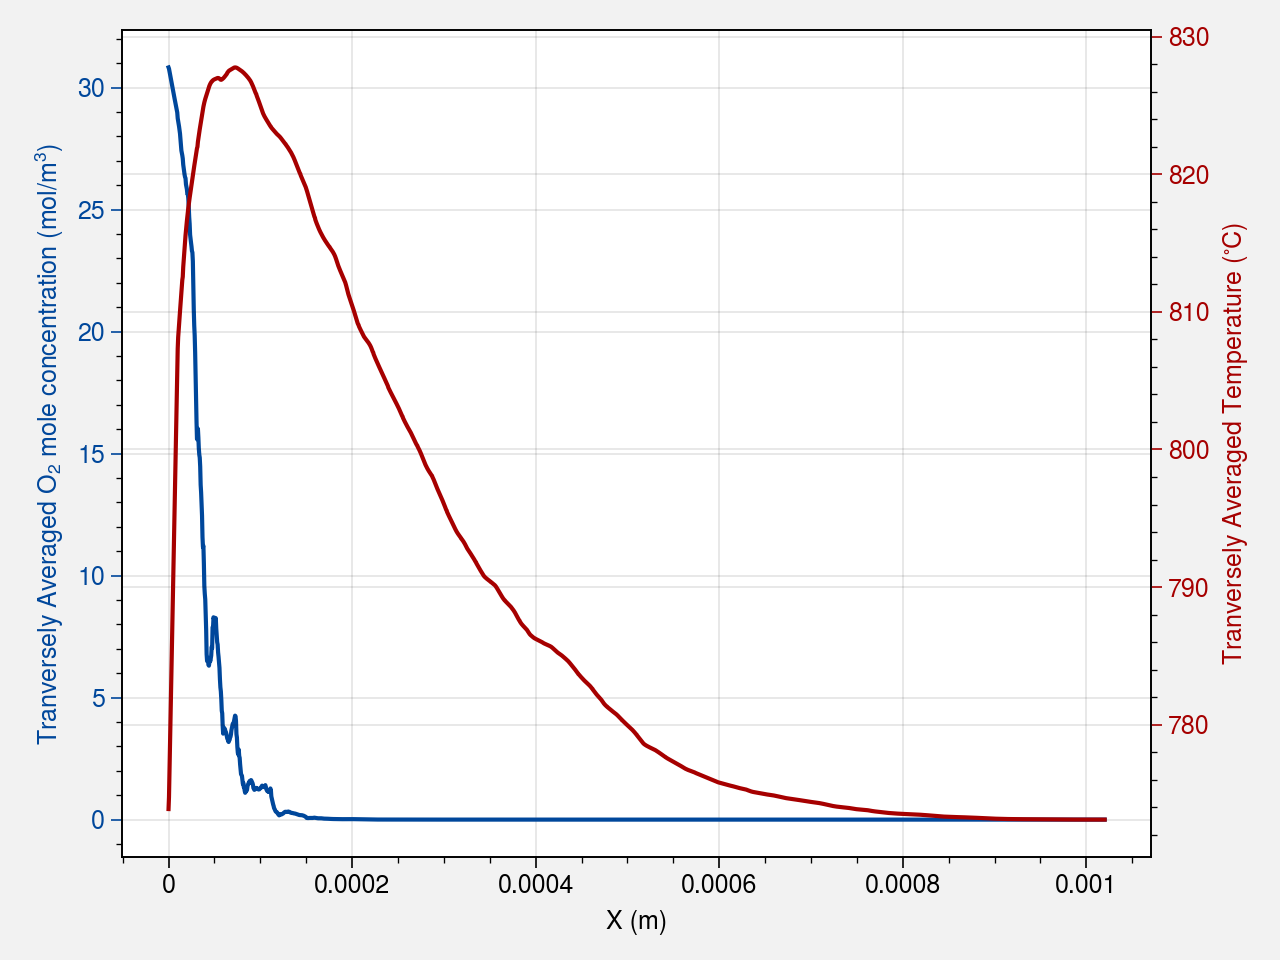

In [112]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.11")

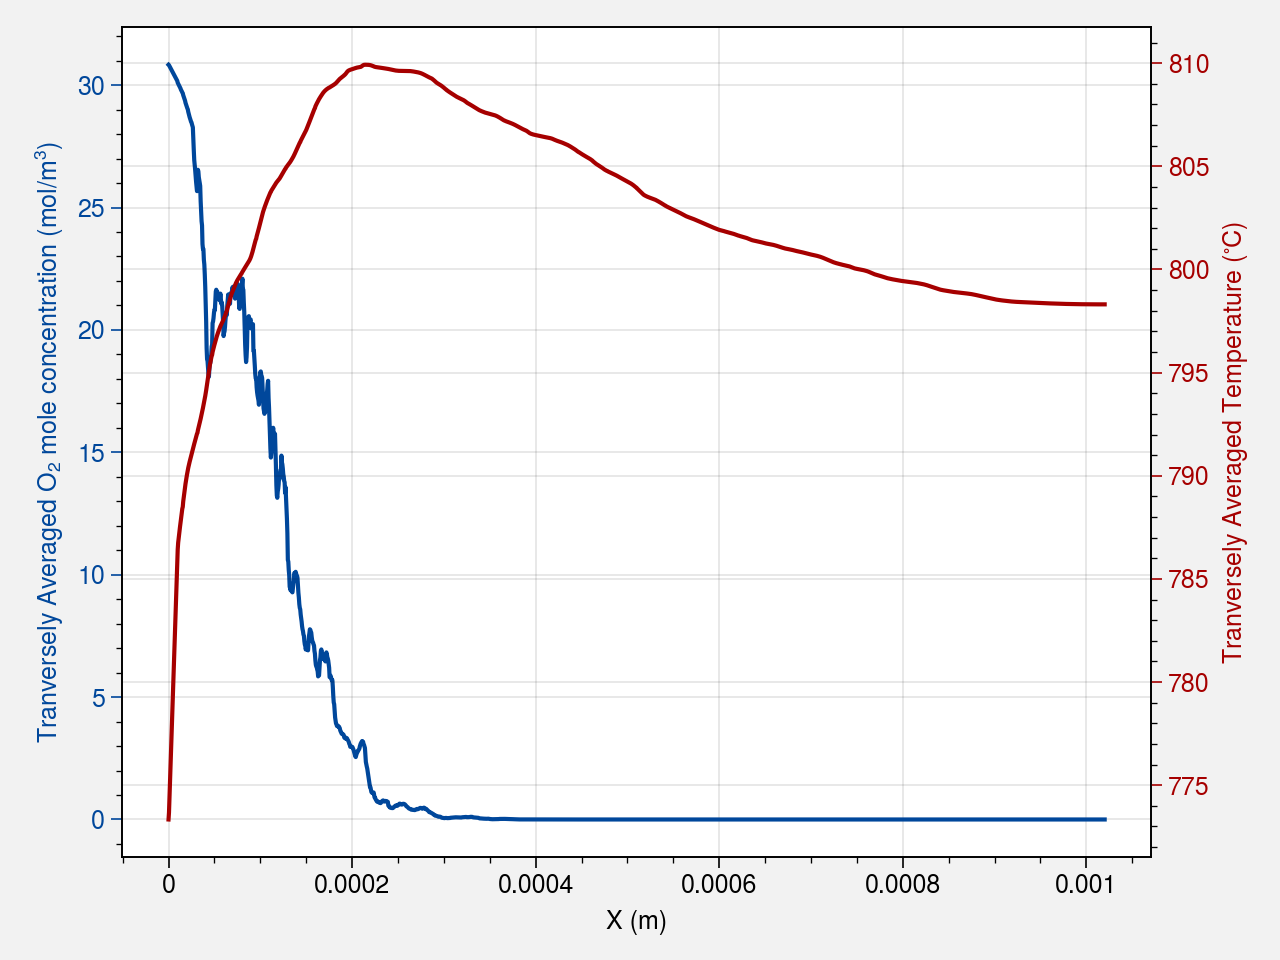

In [113]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"1.01")

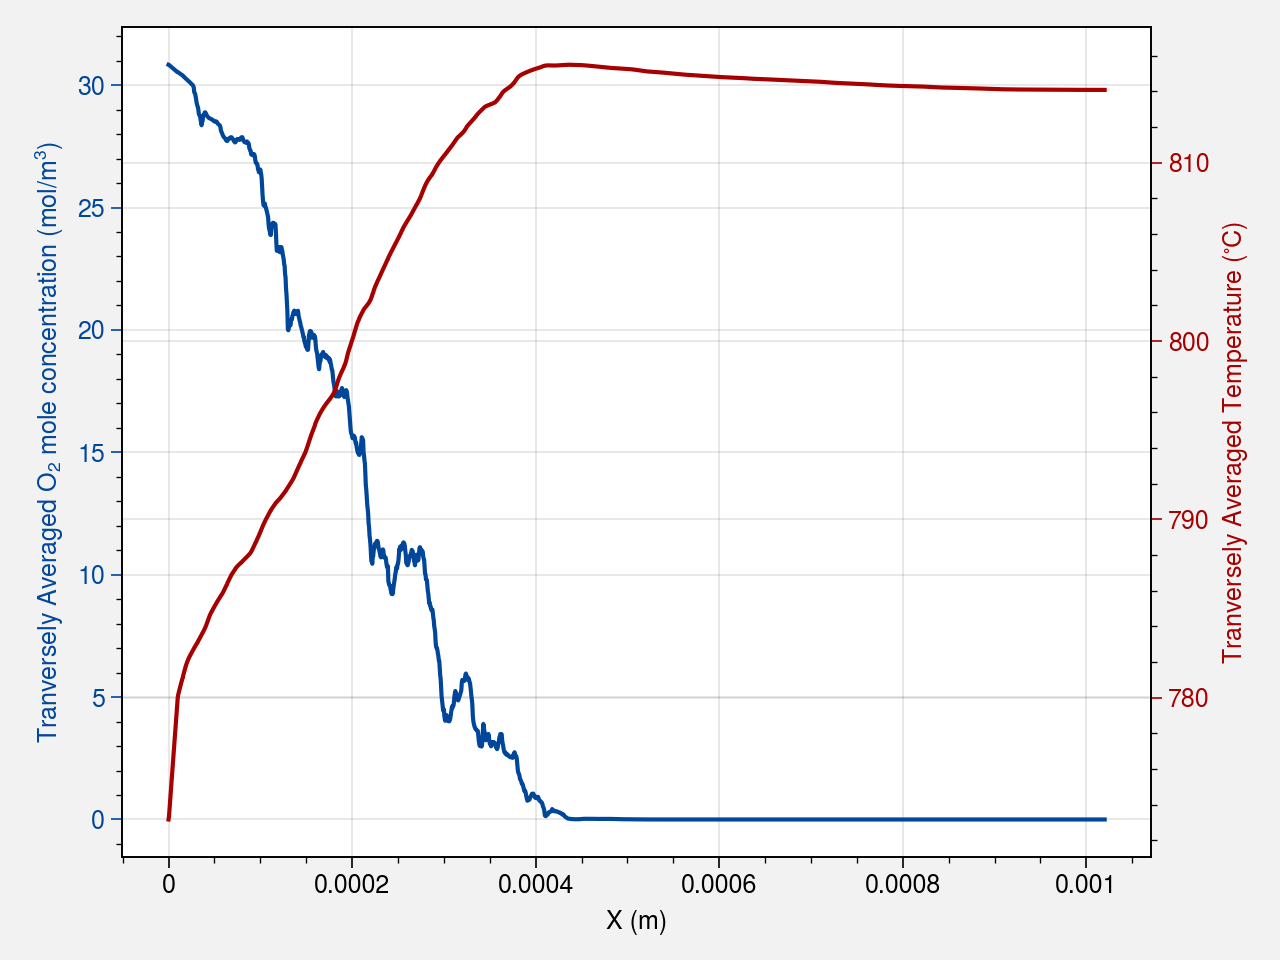

In [114]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"4.01")

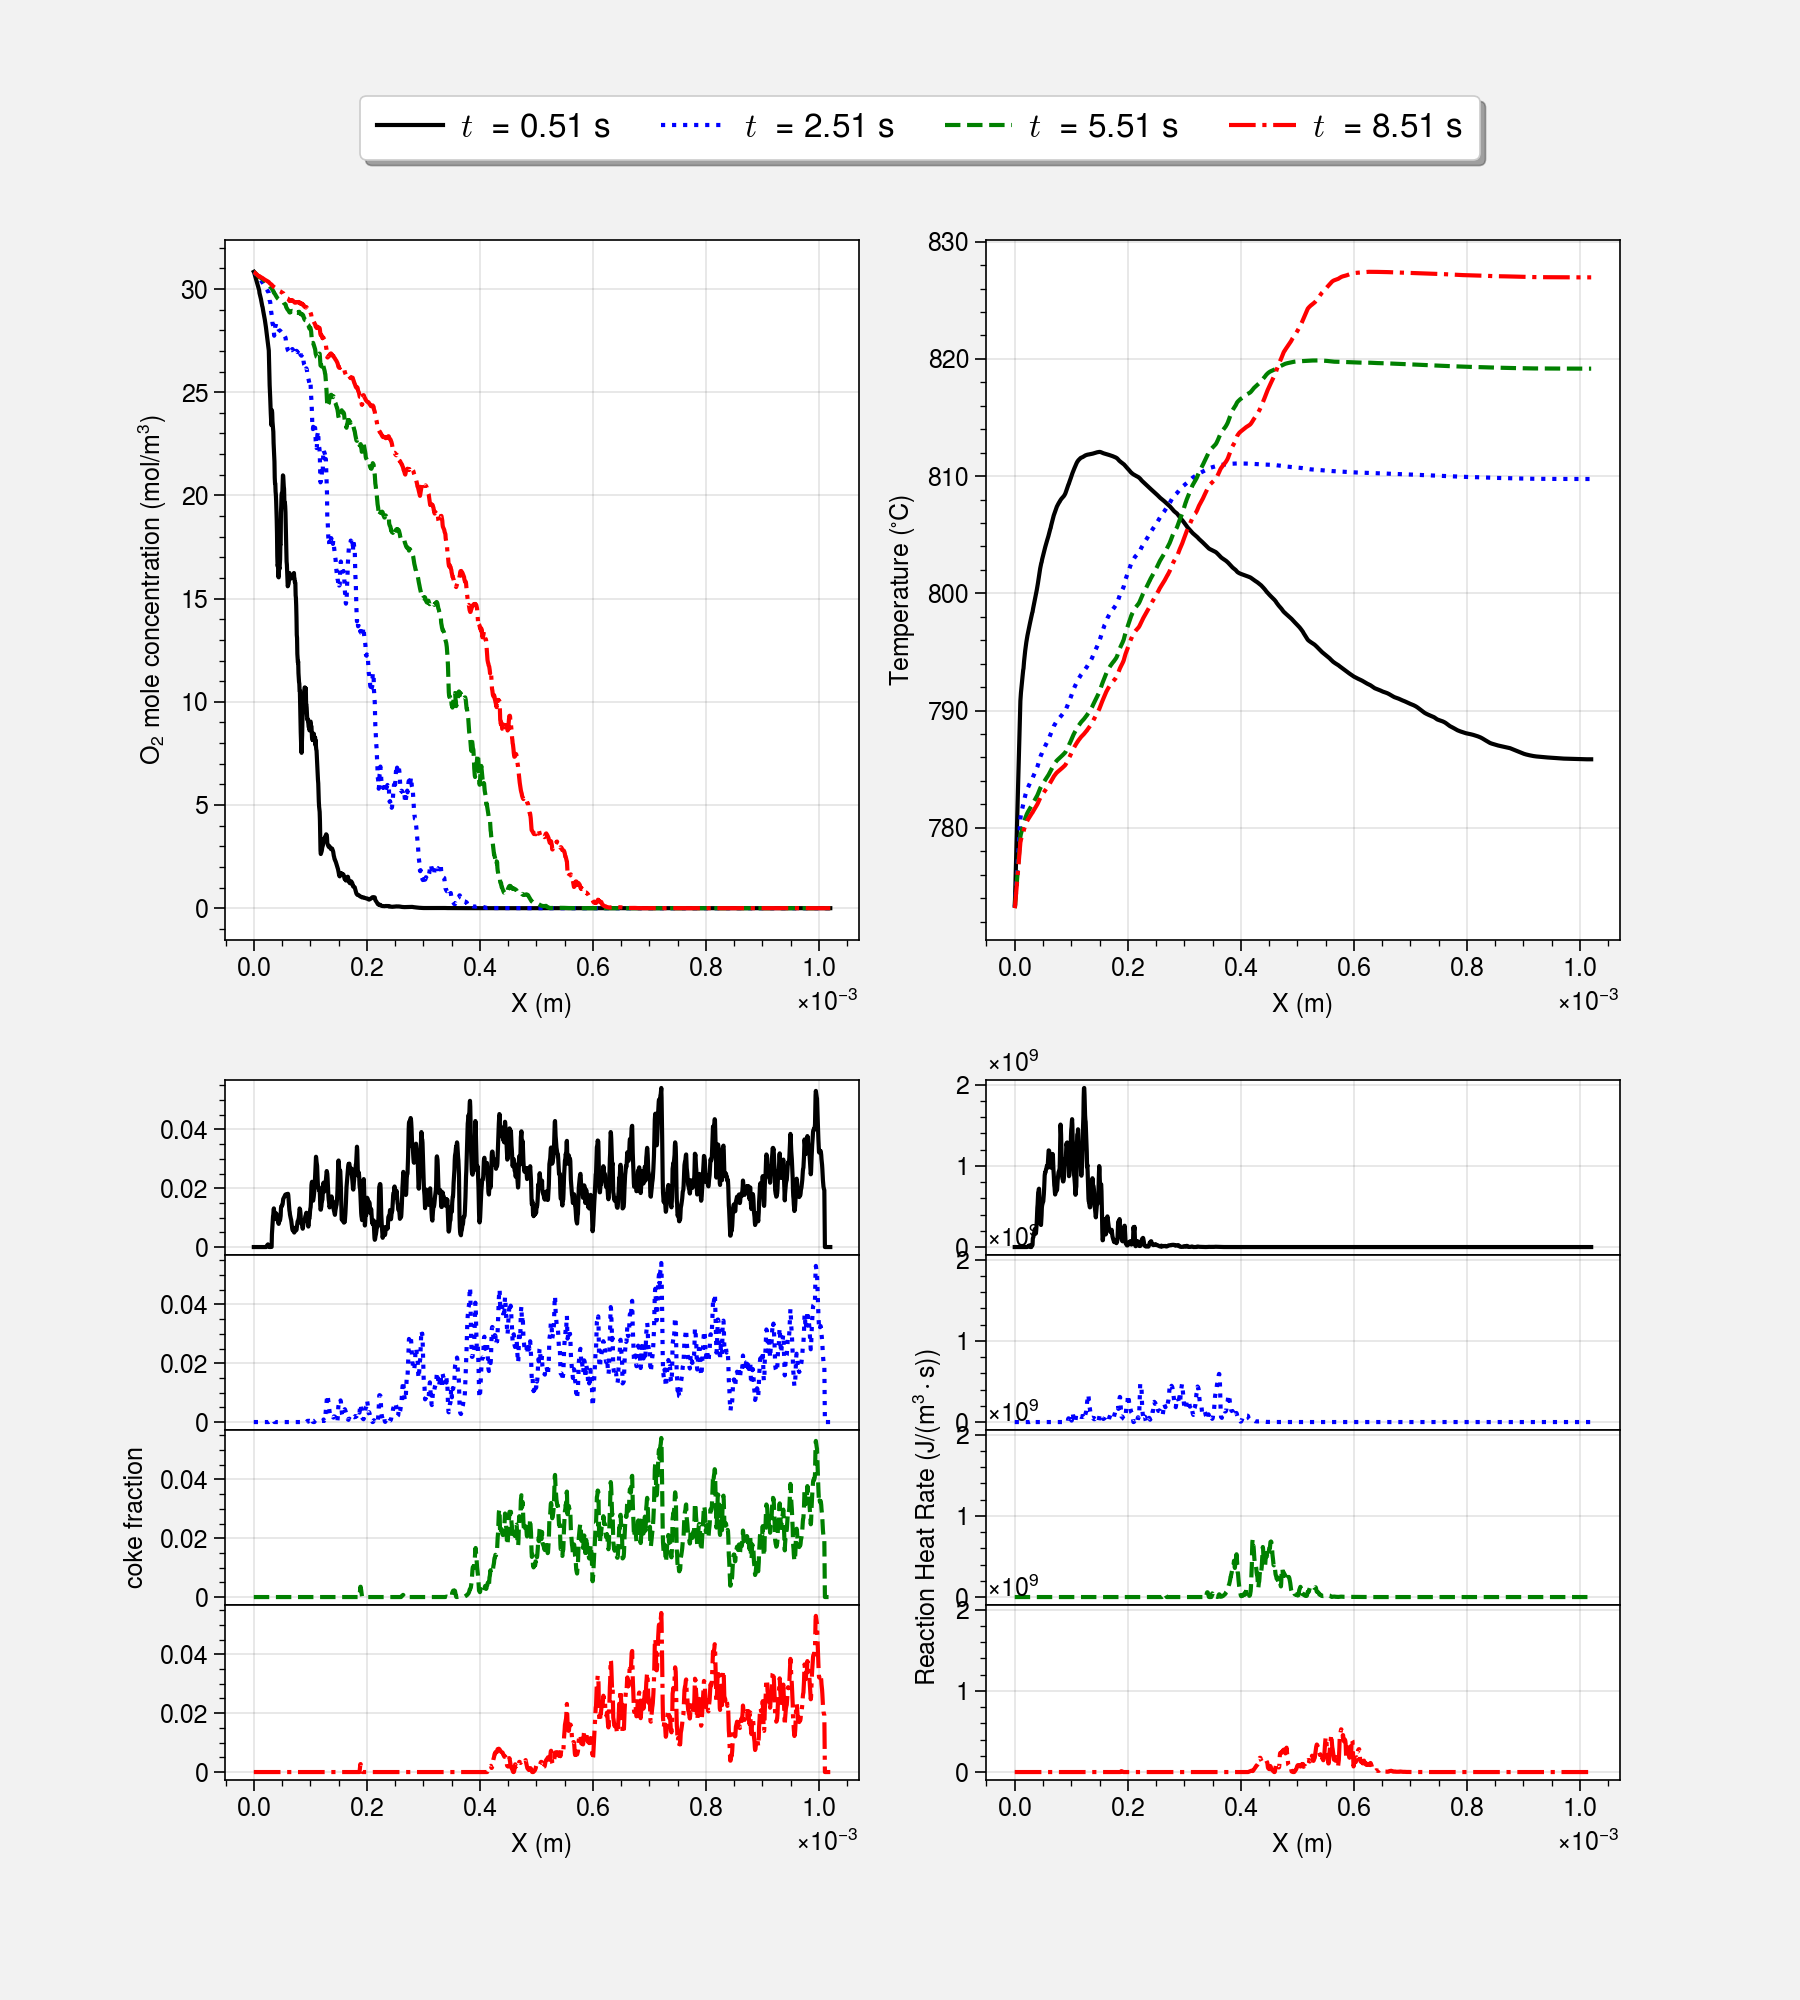

In [115]:
times=["0.51","2.51","5.51","8.51"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


In [116]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

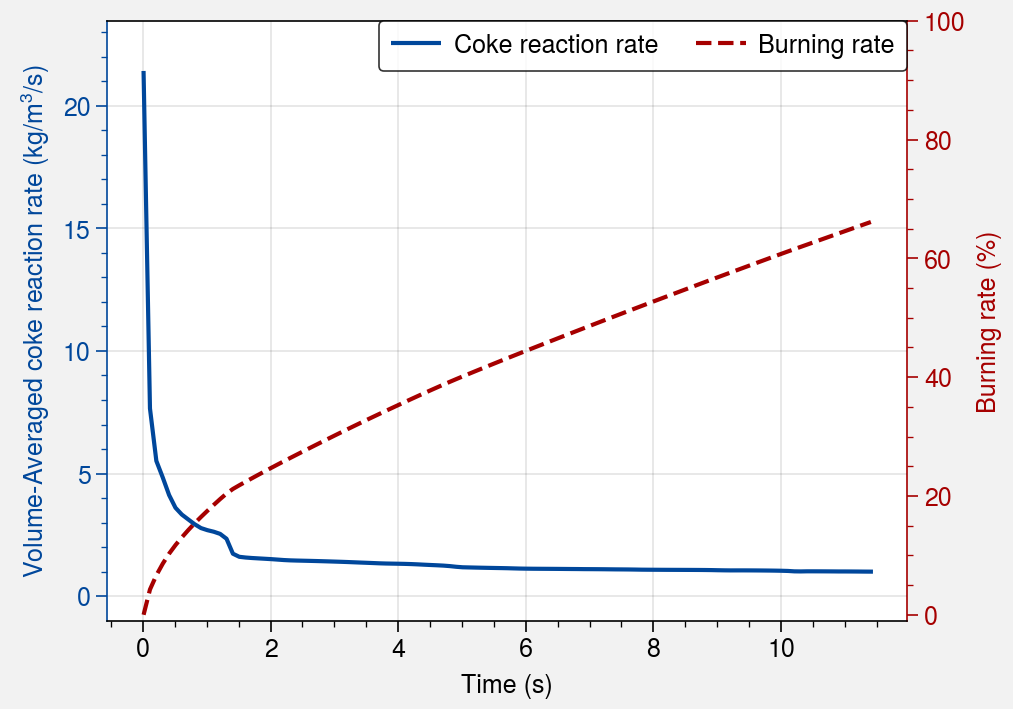

In [117]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)

In [118]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [119]:
pixelResolution=0.5e-6
DO2=7.63596e-6
df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

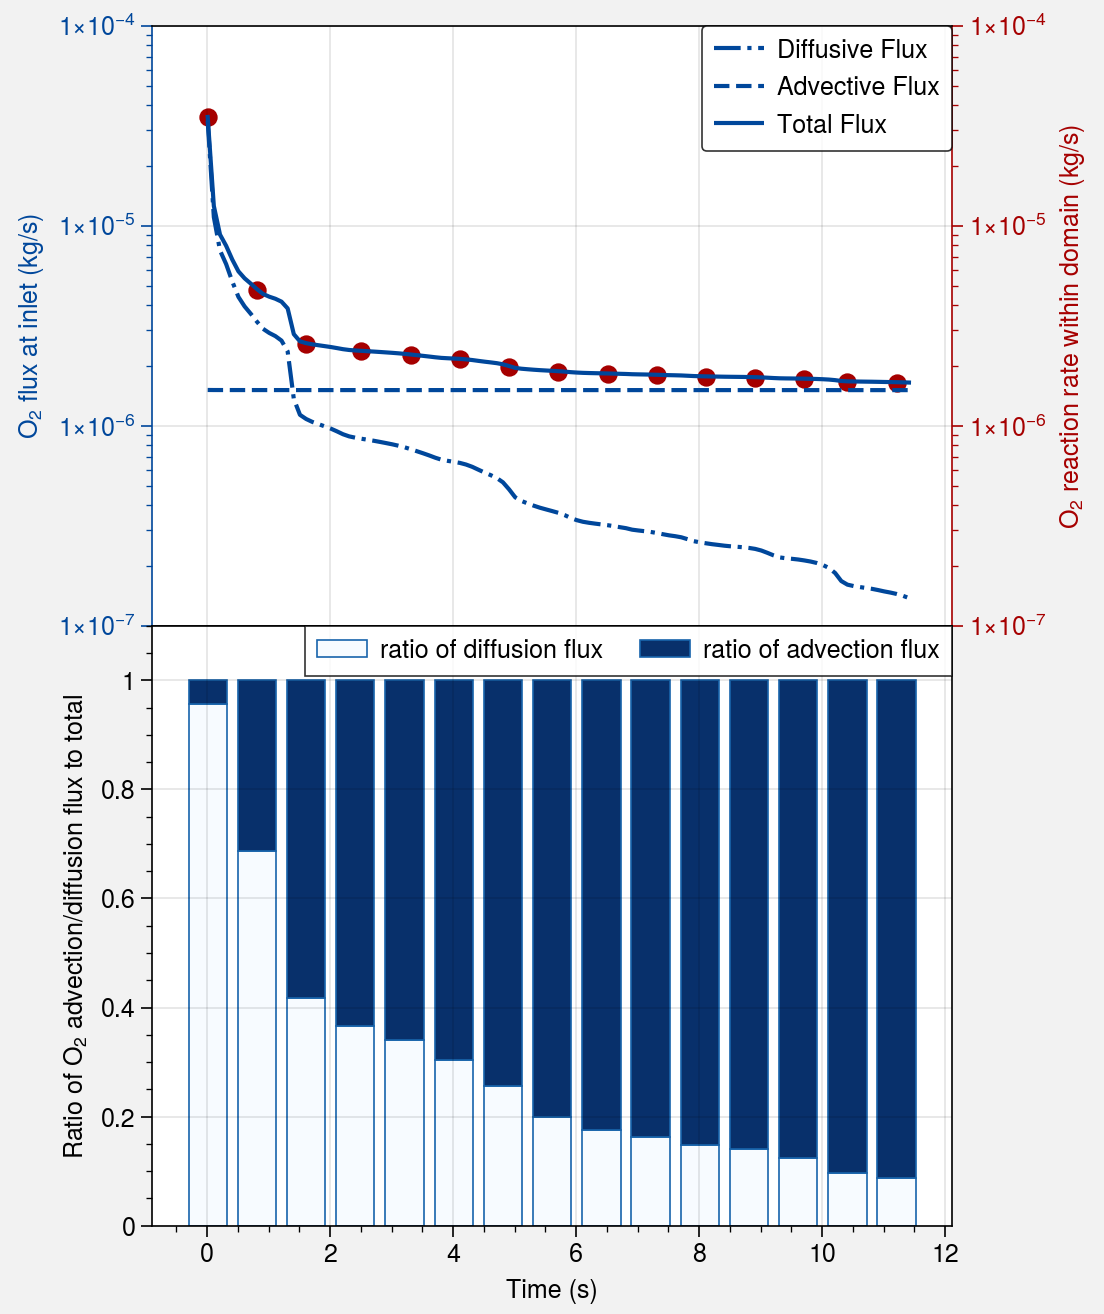

In [129]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=8,ylim=(1e-7,1e-4))

In [130]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

In [122]:
df_O2_flux_at_inlet.head()

,time,O2_adv_flux_by_deltaX,O2_diffusive_Flux_By_DO2,diffusive_flux,advective_flux,total_flux,ratio of diffusion flux,ratio of advection flux
0,0.01,3.018319,4.382373,0.000033,0.000002,0.000035,0.956848,0.043152
1,0.11,3.016477,1.445800,0.000011,0.000002,0.000013,0.879805,0.120195
2,0.21,3.016041,0.985434,0.000008,0.000002,0.000009,0.833050,0.166950
3,0.31,3.015896,0.841748,0.000006,0.000002,0.000008,0.809974,0.190026
4,0.41,3.015616,0.689019,0.000005,0.000002,0.000007,0.777252,0.222748


In [123]:
df_O2_flux_at_inlet["ratio of diffusion flux"]=df_O2_flux_at_inlet["diffusive_flux"]/df_O2_flux_at_inlet["total_flux"]
df_O2_flux_at_inlet["ratio of advection flux"]=df_O2_flux_at_inlet["advective_flux"]/df_O2_flux_at_inlet["total_flux"]


## Show the max temperature and O2 concentration at the outlet

In [124]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

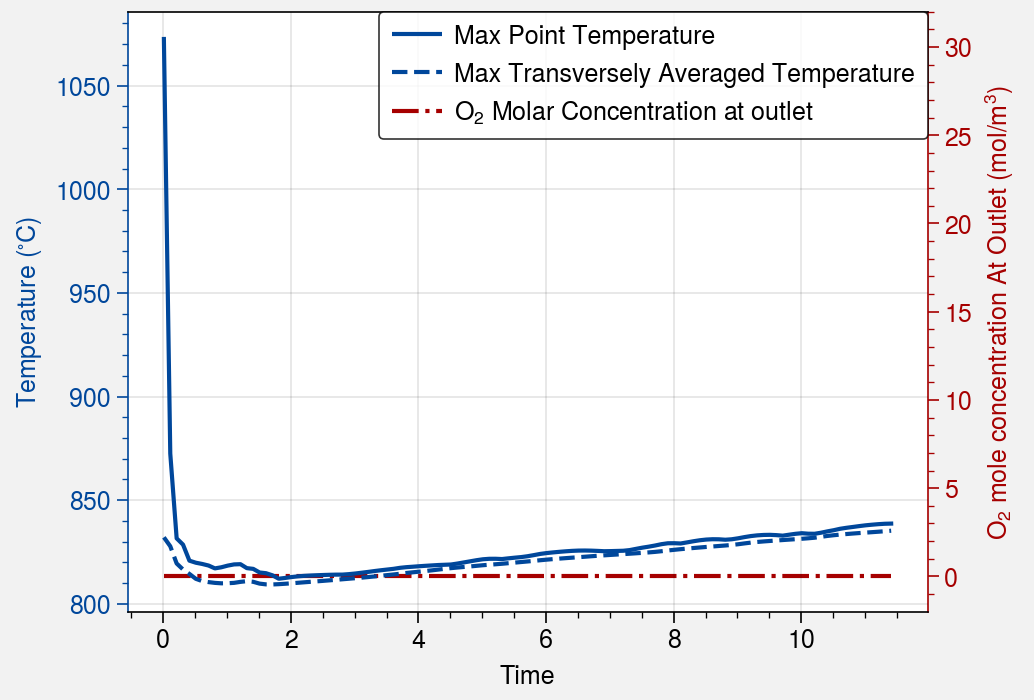

In [125]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

In [126]:
fig.get_figwidth()

5.1737777777777785

In [127]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')